# Preparatory Work and Data Analysis

### 1)

### 2)

In [1]:
import numpy as np
import random

mu_1 = np.array([-3, 0])
mu_2 = np.array([3, 0])
sigma_1 = np.array([[5, -2], [-2, 1]])
sigma_2 = np.array([[5, 2], [2, 2]])

X = []
Y = []

# generate data of the desired distribution
for i in range(0,500):
    r = random.uniform(0, 1)
    if r < 0.3:
        x, y = np.random.multivariate_normal(mu_1, sigma_1)
    else:
        x, y = np.random.multivariate_normal(mu_2, sigma_2)
    X.append(x)
    Y.append(y)


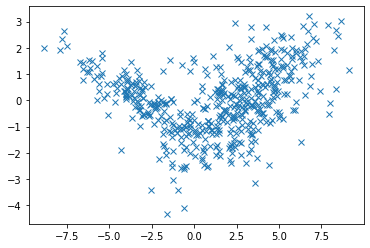

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(X, Y, 'x')
plt.show()

### 3)

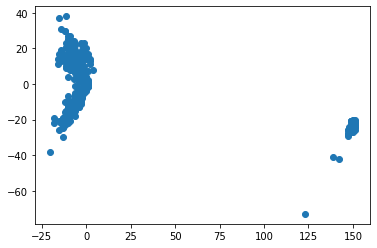

In [8]:
# reading the data and calculating the difference immediately

import pandas as pd

data = pd.read_csv('Unistroke/A01.txt', sep="\t", header=None).diff().iloc[1:]

for i in range(2,10):
    data = pd.concat([data, pd.read_csv('Unistroke/A0' + str(i) + '.txt', sep="\t", header=None).diff().iloc[1:]], ignore_index=True)
for i in range(10,51):
    data = pd.concat([data, pd.read_csv('Unistroke/A' + str(i) + '.txt', sep="\t", header=None).diff().iloc[1:]], ignore_index=True)

data.columns = ['x', 'y']
plt.scatter(data.x, data.y)

In [9]:
data2 = data.to_numpy()

In [10]:
data

,x,y
0,150.0,-21.0
1,0.0,0.0
2,0.0,0.0
3,0.0,0.0
4,0.0,0.0
...,...,...
958,-4.0,7.0
959,-2.0,3.0
960,1.0,-1.0
961,0.0,0.0


In [11]:
# normalizing the data

for i in range(len(data2)):
    x = data2[i][0]
    y = data2[i][1]
    if x != 0 or y != 0:
        mag = np.sqrt(x**2 + y**2)
        data2[i][0] = x / mag
        data2[i][1] = y / mag

# removing vector zero
data2 = data2[~np.all(data2 == 0, axis=1)]

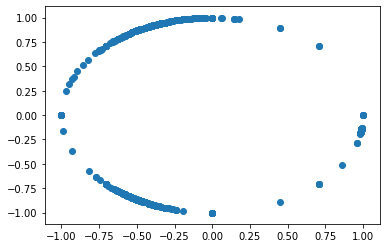

In [12]:
# plotting the normalized vectors

plt.scatter(data2[:,0], data2[:,1])

In [13]:
from sklearn.mixture import GaussianMixture

model = GaussianMixture(n_components=2)

In [14]:
# fitting a two component GMM

y = model.fit_predict(data2)

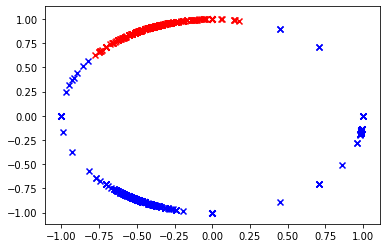

In [15]:
# splitting the data into different subgroups depending on the predicted class.
# Here the code works whether n_components = 2 or 3

x1 = []
y1 = []
x2 = []
y2 = []
x3 = []
y3 = []

for i in range(len(data2)):
    if y[i] == 0:
        x1.append(data2[i][0])
        y1.append(data2[i][1])
    elif y[i] == 1:
        x2.append(data2[i][0])
        y2.append(data2[i][1])
    else:
        x3.append(data2[i][0])
        y3.append(data2[i][1])
        
fig = plt.figure()
ax1 = fig.add_subplot(111)

ax1.scatter(x1, y1, c='b', marker="x")
ax1.scatter(x2, y2, c='r', marker="x")
ax1.scatter(x3, y3, c='k', marker="x")


plt.show()

### 2)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:19: UserWarning: Log scale: values of z <= 0 have been masked
/usr/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.


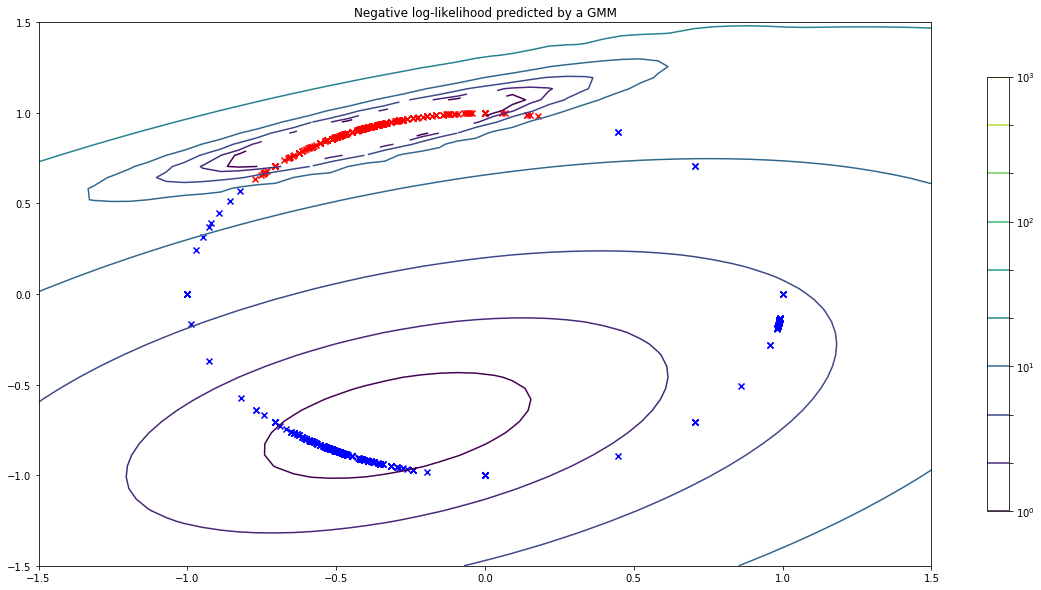

In [16]:
# plotting the contours of the log likelihood of the gmm


from matplotlib.colors import LogNorm
X_train = data2
clf = model

# display predicted scores by the model as a contour plot
x = np.linspace(-1.5, 1.5)
y = np.linspace(-1.5, 1.5)
X, Y = np.meshgrid(x, y)
XX = np.array([X.ravel(), Y.ravel()]).T
Z = -clf.score_samples(XX)
Z = Z.reshape(X.shape)

fig, ax = plt.subplots(figsize=(20, 10))

CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                 levels=np.logspace(0, 3, 10))
CB = plt.colorbar(CS, shrink=0.8, extend='both')
ax.scatter(x1, y1, c='b', marker="x")
ax.scatter(x2, y2, c='r', marker="x")
ax.scatter(x3, y3, c='k', marker="x")
plt.title('Negative log-likelihood predicted by a GMM')
ax.axis('tight')
fig.show()

### 3)

/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.14013453, 0.44843049, 2.44394619, 1.01457399, 0.16816143,
        0.42600897, 0.        , 0.01681614, 0.03363229, 0.30829596]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

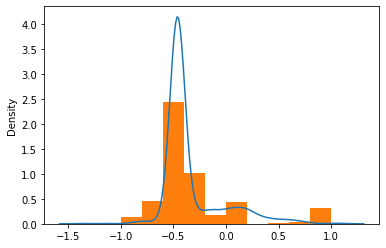

In [20]:
import seaborn as sns

all_x = []
all_y = []

for x_i , y_i in data2:
    all_x.append(x_i)
    all_y.append(y_i)

# fitting a univariate gmm on x-coordinates only
model_x = GaussianMixture(n_components=2)
model_x_pred = model_x.fit_predict(np.array(all_x).reshape(-1,1))
# extracting the parameters
weights = model_x.weights_
mu = model_x.means_
sigma = model_x.covariances_

samples_x = []
# generating random data according to the distribution to plot it
for i in range(0, 1000):
    if random.uniform(0, 1) < weights[0]:
        z = 0
    else:
        z = 1
    samples_x.append(np.random.normal(mu[z], sigma[z], 1))

# plot the predicted distribution curve along with the histogram of the x-coordinates
sns.distplot(samples_x, hist=False)

plt.hist(all_x, density=True)


/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([1.89461883, 0.2690583 , 0.01121076, 0.01681614, 0.2690583 ,
        0.11210762, 0.02242152, 0.01681614, 0.25784753, 2.13004484]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

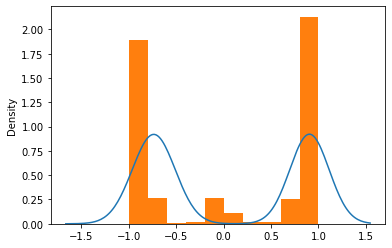

In [21]:
# SAME BUT FOR Y-COORDINATES

model_y = GaussianMixture(n_components=2)
model_y_pred = model_y.fit_predict(np.array(all_y).reshape(-1,1))

weights = model_y.weights_
mu = model_y.means_
sigma = model_y.covariances_

samples_y = []
for i in range(0, 1000):
    if random.uniform(0, 1) < weights[0]:
        z = 0
    else:
        z = 1
    samples_y.append(np.random.normal(mu[z], sigma[z], 1))

sns.distplot(samples_y, hist=False)

plt.hist(all_y, density=True)


/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.26595745, 0.38297872, 2.87234043, 0.53191489, 0.0106383 ,
        0.25531915, 0.        , 0.03191489, 0.06382979, 0.58510638]),
 array([-1. , -0.8, -0.6, -0.4, -0.2,  0. ,  0.2,  0.4,  0.6,  0.8,  1. ]),
 <a list of 10 Patch objects>)

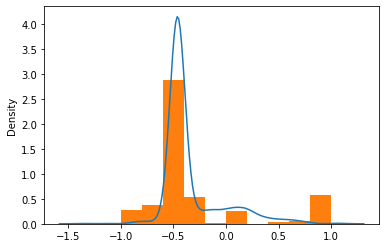

In [22]:
# plotting the histogram of x-coordinates of the FIRST CLASS against the univariate distr

sns.distplot(samples_x, hist=False)
plt.hist(x1, density=True)

/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.69634482, 0.49738916, 1.0693867 , 3.23302954, 2.28799014,
        0.69634482, 0.49738916, 0.22382512, 1.19373399, 0.09947783]),
 array([-0.7739573 , -0.67867303, -0.58338875, -0.48810448, -0.3928202 ,
        -0.29753593, -0.20225166, -0.10696738, -0.01168311,  0.08360116,
         0.17888544]),
 <a list of 10 Patch objects>)

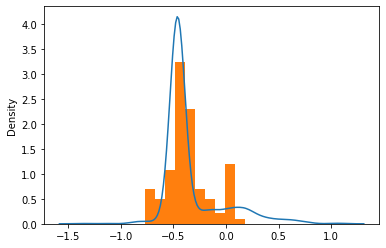

In [23]:
# plotting the x coordinates of the SECOND CLASS against the univariate distr

sns.distplot(samples_x, hist=False)
plt.hist(x2, density=True)

/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([3.72874176, 0.60648209, 0.0224623 , 0.03369345, 0.53909519,
        0.224623  , 0.0224623 , 0.0449246 , 0.01123115, 0.0449246 ]),
 array([-1.        , -0.81055728, -0.62111456, -0.43167184, -0.24222912,
        -0.0527864 ,  0.13665631,  0.32609903,  0.51554175,  0.70498447,
         0.89442719]),
 <a list of 10 Patch objects>)

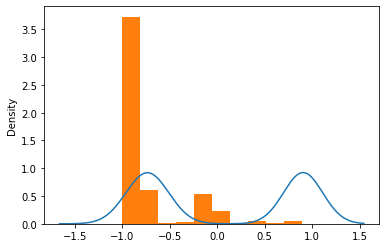

In [24]:
# plotting the Y-COORDINATES of the FIRST CLASS against the univariate distr

sns.distplot(samples_y, hist=False)
plt.hist(y1, density=True)

/home/hd/.local/lib/python3.7/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


(array([0.3230524 , 0.12922096, 1.42143056, 0.38766288, 1.09837816,
        1.35682008, 2.2613668 , 7.75325762, 6.52565849, 6.00877465]),
 array([0.63323779, 0.66991401, 0.70659023, 0.74326645, 0.77994267,
        0.8166189 , 0.85329512, 0.88997134, 0.92664756, 0.96332378,
        1.        ]),
 <a list of 10 Patch objects>)

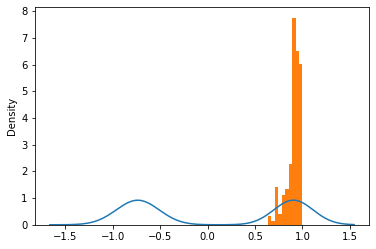

In [25]:
# plotting the Y-COORDINATES of the SECOND CLASS against the univariate distr


sns.distplot(samples_y, hist=False)
plt.hist(y2, density=True)

### 4)

Using a bivariate GMM is valid, as the univariate one fails to capture the "natural" clustering of the data. The predicted distribution doesn't exactly conform with the shape of the histograms.

###  5)

Isn't this already done in the contours?

# Mandatory Work
### 1)

(array([0.01099447, 0.64867377, 0.04397788, 0.01099447, 0.09895024,
        0.        , 0.00732965, 0.27852659, 0.49475118, 0.04031306]),
 array([-2.97644398, -2.36464031, -1.75283665, -1.14103299, -0.52922932,
         0.08257434,  0.694378  ,  1.30618166,  1.91798533,  2.52978899,
         3.14159265]),
 <a list of 10 Patch objects>)

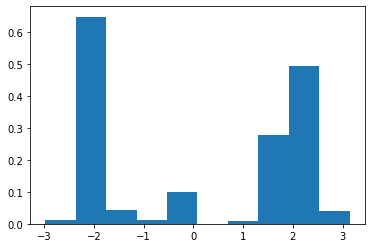

In [26]:
# calculating the angles and plotting their histogram

angles = np.arctan2(data2[:,1], data2[:,0])
plt.hist(angles, density=True)

### 5)

In [28]:
# CODE FOR VON MISES DISTRIBUTION COPIED FROM 
# https://framagit.org/fraschelle/mixture-of-von-mises-distributions/-/tree/master


from scipy.special import iv
from scipy.optimize import fsolve

def vonmises_density(x,mu,kappa):
    """
    Calculate the von Mises density for a series x (a 1D numpy.array).
    Input : 
        x : a 1D numpy.array of size L
        mu : a 1D numpy.array of size n, the mean of the von Mises distributions
        kappa : a 1D numpy.array of size n, the dispersion of the von Mises distributions
    Output : 
        a (L x n) numpy array, L is the length of the series, and n is the size of the array containing the parameters. Each row of the output corresponds to a density
    """
    res = []
    for i in x:
        f = np.exp(kappa*np.cos(i-mu))
        n = 2*np.pi*iv(0,kappa)
        res.append(f/n)
    return(np.array(res))

def vonmises_pdfit(series):
    """
    Calculate the estimator of the mean and deviation of a sample, for a von Mises distribution
    Input : 
        series : a 1D numpy.array
    Output : 
        the estimators of the parameters mu and kappa of a von Mises distribution, in an list [mu, kappa]
    See https://en.wikipedia.org/wiki/Von_Mises_distribution 
    for more details on the von Mises distribution
    """
    s0 = np.mean(np.sin(series))
    c0 = np.mean(np.cos(series))
    mu = np.arctan2(s0,c0)
    var = 1-np.sqrt(s0**2+c0**2)
    k = lambda kappa: 1-iv(1,kappa)/iv(0,kappa)-var
    kappa = fsolve(k, 0.0)[0]
    return([mu,kappa])

def mixture_vonmises_pdfit(series, n=2, threshold=1e-3):
    """
    Find the parameters of a mixture of von Mises distributions, using an EM algorithm.
    Input : 
        series : a 1D numpy array, representing the stochastic perdioci process
        n : an int, the number of von Mises distributions in th emixture
        threshold : a float, correspond to the euclidean distance between the old parameters and the new ones
    Output : a (3 x n) numpy-array, containing the probability amplitude of the distribution, and the mu and kappa parameters on each line.
    """
    # initialise the parameters and the distributions
    pi = np.random.random(n)
    mu = np.random.vonmises(0.0,0.0,n)
    kappa = np.random.random(n)
    t = pi*vonmises_density(series,mu,kappa)
    s = np.sum(t, axis=1)
    t = (t.T/s).T
    thresh = 1.0
    # calculate and update the coefficients, untill convergence
    while thresh > threshold:
        new_pi = np.mean(t, axis=0)
        new_mu = np.arctan2(np.sin(series)@t,np.cos(series)@t)      
        c = np.cos(series)@(t*np.cos(new_mu))+np.sin(series)@(t*np.sin(new_mu))
        k = lambda kappa: (c-iv(1,kappa)/iv(0,kappa)*np.sum(t, axis=0)).reshape(n)
        new_kappa = fsolve(k, np.zeros(n))
        thresh = np.sum((pi-new_pi)**2+(mu-new_mu)**2+(kappa-new_kappa)**2)
        pi = new_pi
        mu = new_mu
        kappa = new_kappa
        t = pi*vonmises_density(series,mu,kappa)
        s = np.sum(t, axis=1)
        t = (t.T/s).T
    res = np.array([pi,mu,kappa])
    # in case there is no mixture, one fits the data using the estimators
    if n == 1:
        res = vonmises_pdfit(series)
        res = np.append(1.0,res)
        res = res.reshape(3,1)
    return(res)


In [29]:
m = mixture_vonmises_pdfit(angles,n=2)
m

array([[  0.61760991,   0.38239009],
       [  1.93142736,  -2.07927965],
       [  1.77663122, 102.97554197]])

In [32]:
# plot the empirical distribution
h = np.histogram(angles, bins=55)
h_norm = np.array(h[0])/np.sum(h[0])
t = [np.mean(h[1][i:i+2]) for i in range(len(h[1])-1)]
#plt.plot(t,h_norm)
# plot the distribution using the parameters obtained from the EM algorithm
f = np.zeros(len(t))
for i in range(m.shape[1]):
    f += m[0,i]*vonmises_density(t,m[1,i],m[2,i])
plt.plot(t,f/np.sum(f))
plt.hist(angles, density=True)

TypeError: _histogram_dispatcher() got an unexpected keyword argument 'n_bins'